> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>1.PatientId = The Id of the patient\
2.Appointment Id = The Id no for the appointment\
3.Patient Gender = M-Male, F- Female\
4.ScheduledDay= tells us on what day the patient set up their appointment.\
5.ApppintmentDay = tells us the appointment date of the patient\
6.Patient Age\
7.Neighbourhood= The location(neighbourhood) the hospital is located\
8.Scholarship= shows whether or not the patient is benefiting from Bolsa Familia (0-No, 1-Yes)\
9.Hipertension= shows whether the patient is hypertensive or not (0-No, 1-Yes)\
10.Diabetes= shows whether the patient is diabetic or not (0-No, 1-Yes)\
11.Alcoholism = shows whether the patient is alcoholic or not (0-No, 1-Yes)\
12.Handcap = shows if the patient is handicapped or not (0-No, 1-Yes)\
13.Sms received =shows if the patient received a message reminding about appointmentsor not (0-No, 1-Yes)\
14.Noshow= this tells us if the patient showed up for the appointment or not (0= patient showed up, 1= patient didnt show up)\

>***Question for Analysis***
>*Q1. Do patient supported by the scholarship show up for appointments more than patient without scholarship?*

>*Q2. Does the sending of SMS influence patient's presence at appointments?*

>*Q3. Are patient with Hypertension or Diabetes, making more appointments?*

>*Q4. Is Alcoholism a major predictor of patient showing up at appointments?


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_show_data.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


>**We look at the numbers of rows and columns in our data set using .shape**\
Our data set contains 110527 rows and 14 columns

In [3]:
df.shape

(110527, 14)

**We also check for Missing or null data using .info**\
Our data set has no null data judging from the result from the .info and isnull().sum()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**The dtypes shows the data type of the columns in our dataset. The dates are not in date format and the column 'No show will be converted to int64 for easier manipulations.**

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**The function below shows that there are no duplicated rows in our data sets**

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning (Dropping irrelevant columns that are not neccesary for our questions)
**We will also drop the row with the age of -1**

In [10]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace = True)
df.tail(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
df.drop(labels =99832, axis =0, inplace= True)

In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


**Converting all column names to lowercase to aid easy typing and renaming some of the columns to aid easy handling**

In [14]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [15]:
df.rename(columns = {'no-show':'no_show'}, inplace = True)

In [16]:
df.head(10)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
**Univariate Analysis**

### Research Question 1 (Did more people make the appointment than people who did not
**From the graph below, It can be observed that more people attended the interview than people who did not**

In [17]:
attend = df.query('no_show == "No"')
No_attend =  df.query('no_show == "Yes"')

In [18]:
fig = plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

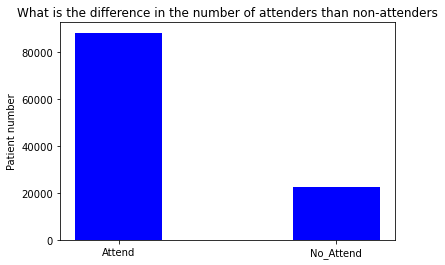

In [23]:
plt.bar(['Attend','No_Attend'],[attend.no_show.count(), No_attend.no_show.count()], width = 0.4, color = 'blue')
plt.ylabel('Patient number')
plt.title('What is the difference in the number of attenders than non-attenders')
plt.show()

### Question 2**= Does the sending of SMS influence patient's presence at appointments?? Bivariate Analysis.

***From the plot below, when patients that received sms_reminders  are compared with patients that do not receive the reminders, It can be observed that the people who received the reimnder recoreded higher presence at their appointment(No,1) compared to people who did not(Yes, 0); Hence SMS reminders is also a major factor that enhances patient's presence at the appointments***.

Text(0.5, 1.0, 'The graph showing the relationship between the patient attendance and SMS received')

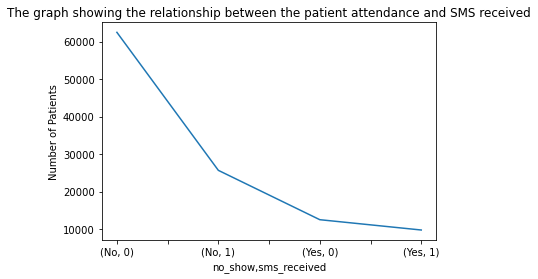

In [27]:
df.groupby('no_show')['sms_received'].value_counts().plot()
plt.ylabel('Number of Patients')
plt.title('The graph showing the relationship between the patient attendance and SMS received')

### Question 3**= Does the Gender affect patient's presence at appointments?? 
**Result - From the piechart below, we can observe that gender also affected the rate at which people made their appiontments. 
Women are more likely to make the appointment than men. This show that women care more about their health care than men.**

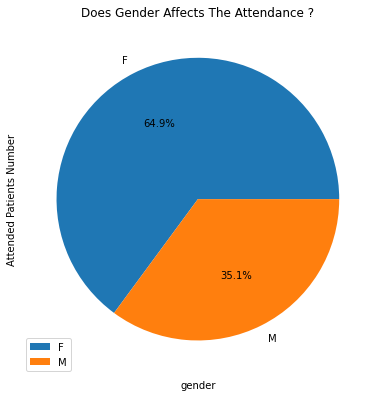

In [38]:
attend_1 = df.no_show == "No"
noattend_1 = df.no_show == "Yes"
def Gender_effect(Attendance_state,y_axis): 
    plt.figure(figsize=[10,6.5])
    df['gender'][Attendance_state].value_counts(normalize=True).plot(label='Attend',kind='pie',autopct='%1.1f%%')
    plt.legend();
    plt.title('Does Gender Affects The Attendance ?')
    plt.xlabel('gender')
    plt.ylabel(y_axis);
    y_axis='Attended Patients Number'
Gender_effect(attend_1, y_axis)

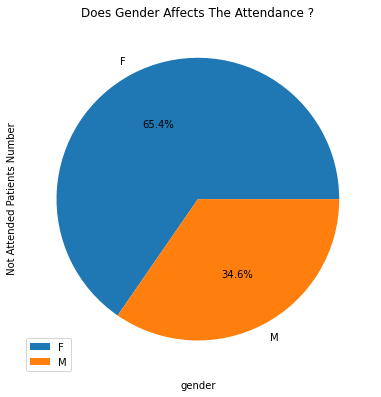

In [39]:
 y_axis=' Not Attended Patients Number'
Gender_effect(noattend_1, y_axis)

<a id='conclusions'></a>
## Conclusions and Limitations
1. There are larger percentage and number of people attending than people not attending the appointments
2. SMS received about appointments plays a significant role in patients making their appointments
3. Women care more about their health than Men as they attend more appointments than men
*The data set was appropriately cleaned to remove columns not necessary for this analysis. After appropriate cleaning and wrangling, it was then subjected for exploratory anslysis*
Further questions can still be asked about this data to really show how having other ailments or disorders affect patient attendance.
**Limitations- A major limitation was the inability to use appropriate function methid to plot graphs and i had to learn a lot of theoretical methods.**